In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import networkx as nx
from collections import Counter
import re

In [52]:
# Load the dataset
df = pd.read_csv('Kenya Protests June 2025.csv')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index for time series analysis
df.set_index('Date', inplace=True)

# Sort by date
df = df.sort_index()

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (49823, 178)

First few rows:


,Query Id,Query Name,Title,Url,Domain,Sentiment,Page Type,Language,Country Code,Continent Code,...,Tiktok Shares,Tiktok Views,Weblog Title,Youtube Comments,Youtube Duration Milliseconds,Youtube Favourites,Youtube Likes,Youtube Subscriber Count,Youtube Video Count,Emotion
Date,,,,,,,,,,,,,,,,,,,,,
2025-06-04 22:04:29,2003594270,Kenya protests 2025,Hiyo finance bill tuna ireject na wapi?,http://twitter.com/ndika_palmer/statuses/19303...,twitter.com,neutral,twitter,tl,KEN,AFRICA,...,NaN,NaN,ndika_palmer (Kijana ya Nairobi 🚦),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-04 22:13:56,2003594270,Kenya protests 2025,Ruto Must Go!\n\n#RutoMustGo \n#FreeOurShujaa\...,http://twitter.com/Mzalend0Halisi/statuses/193...,twitter.com,neutral,twitter,en,KEN,AFRICA,...,NaN,NaN,Mzalend0Halisi (MzalendoHalisi),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-04 22:18:15,2003594270,Kenya protests 2025,Ruto Must Go!\n\n#RutoMustGo \n#FreeOurShujaa\...,http://twitter.com/Mzalend0Halisi/statuses/193...,twitter.com,neutral,twitter,en,KEN,AFRICA,...,NaN,NaN,Mzalend0Halisi (MzalendoHalisi),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-04 22:33:52,2003594270,Kenya protests 2025,RT @KenyanSays ''We've spent the last 13 years...,http://twitter.com/kamauwakimani1/statuses/193...,twitter.com,negative,twitter,en,KEN,AFRICA,...,NaN,NaN,kamauwakimani1 (_R¡@n),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-04 22:48:20,2003594270,Kenya protests 2025,RT @MugureNjehia It is time payslip gang woke ...,http://twitter.com/emmanuelkimtai8/statuses/19...,twitter.com,neutral,twitter,en,KEN,AFRICA,...,NaN,NaN,emmanuelkimtai8 (kunta kinte 📍🇰🇪),NaN,NaN,NaN,NaN,NaN,NaN,Sadness


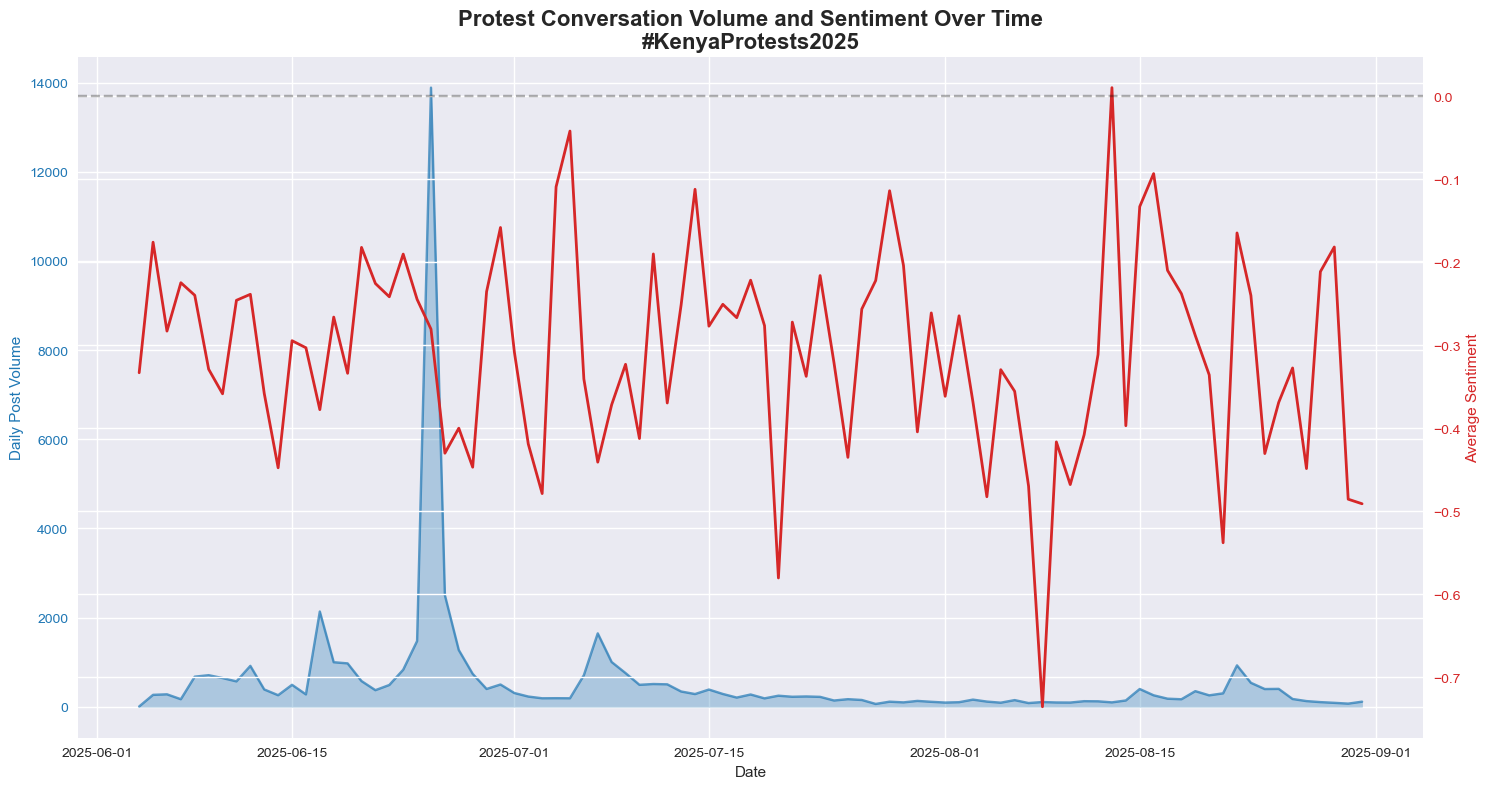

<Figure size 800x550 with 0 Axes>

In [56]:
# VISUALISATION 1: Sentiment and Volume Over Time (Dual-axis plot)

fig, ax1 = plt.subplots(figsize=(15, 8))

# Calculate daily volume
daily_volume = df.resample('D').size()

# Calculate daily sentiment (convert to numerical if needed)
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment_numeric'] = df['Sentiment'].map(sentiment_map)
daily_sentiment = df.resample('D')['sentiment_numeric'].mean()

# Plot volume
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Post Volume', color='tab:blue')
ax1.plot(daily_volume.index, daily_volume.values, color='tab:blue', alpha=0.7, label='Post Volume')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.fill_between(daily_volume.index, daily_volume.values, alpha=0.3, color='tab:blue')

# Create second y-axis for sentiment
ax2 = ax1.twinx()
ax2.set_ylabel('Average Sentiment', color='tab:red')
ax2.plot(daily_sentiment.index, daily_sentiment.values, color='tab:red', linewidth=2, label='Sentiment')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.3)

plt.title('Protest Conversation Volume and Sentiment Over Time\n#KenyaProtests2025', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Export the visualisation
plt.savefig('Sentiment Volume Timeseries.png', dpi=300, bbox_inches='tight')

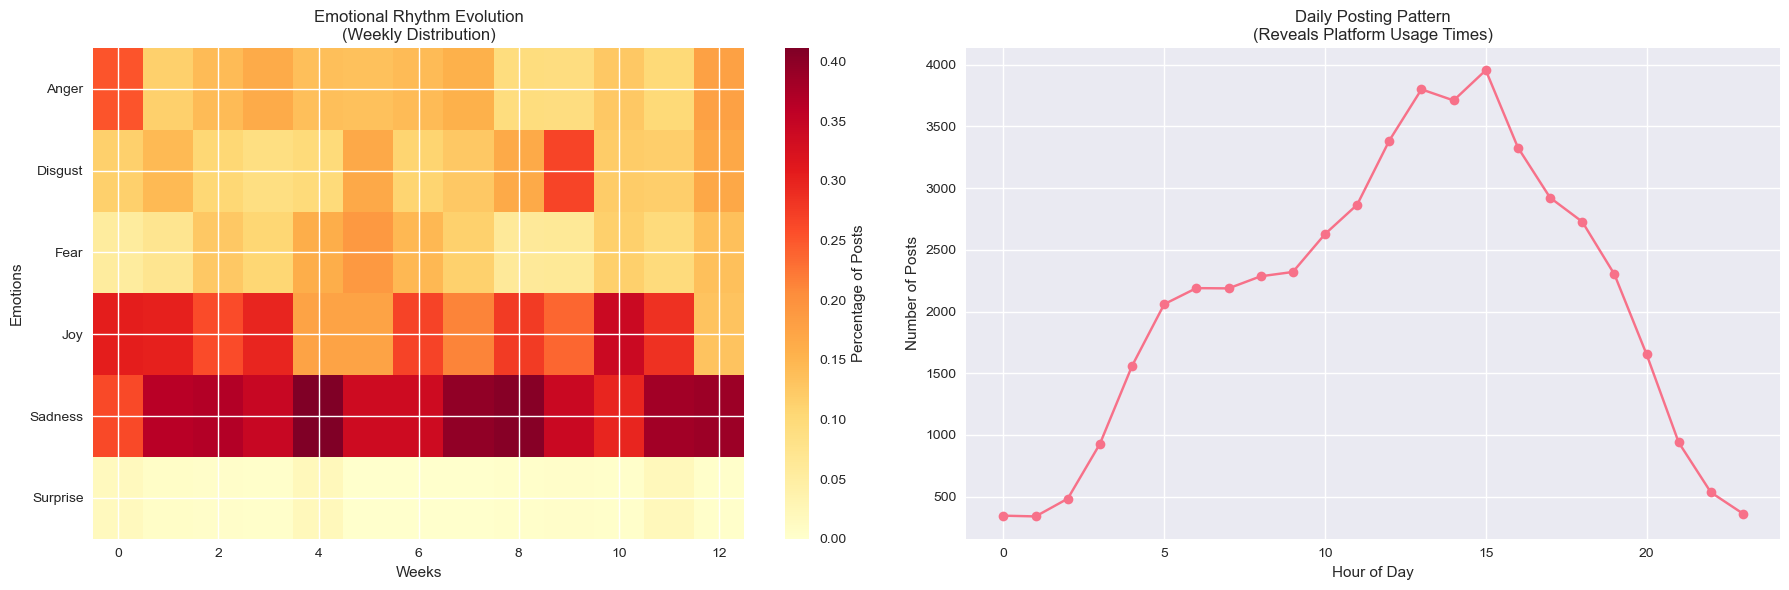

In [59]:
# VISUALIZATION 2: Emotion Distribution and Platform Engagement Patterns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Emotion distribution over time (heatmap style)
emotion_counts = df.groupby([pd.Grouper(freq='W'), 'Emotion']).size().unstack(fill_value=0)

# Normalise by week for better visualisation
emotion_pct = emotion_counts.div(emotion_counts.sum(axis=1), axis=0)

im = ax1.imshow(emotion_pct.T, aspect='auto', cmap='YlOrRd', interpolation='nearest')
ax1.set_yticks(range(len(emotion_pct.columns)))
ax1.set_yticklabels(emotion_pct.columns)
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Emotions')
ax1.set_title('Emotional Rhythm Evolution\n(Weekly Distribution)')
plt.colorbar(im, ax=ax1, label='Percentage of Posts')

# Plot 2: Platform-specific patterns
platform_data = df[df['Page Type'] == 'twitter']  # Focus on Twitter as primary platform

# Calculate engagement metrics if available
engagement_metrics = []
for col in ['Youtube Likes', 'Youtube Comments', 'Tiktok Shares', 'Tiktok Views']:
    if col in df.columns and df[col].notna().sum() > 0:
        engagement_metrics.append(col)

if engagement_metrics:
    weekly_engagement = platform_data.resample('W')[engagement_metrics].sum()
    weekly_engagement.plot(ax=ax2, linewidth=2)
    ax2.set_title('Platform Engagement Patterns\n(Where Data Available)')
else:
    # Fallback: show post frequency by hour of day
    hourly_pattern = platform_data.groupby(platform_data.index.hour).size()
    ax2.plot(hourly_pattern.index, hourly_pattern.values, marker='o')
    ax2.set_xlabel('Hour of Day')
    ax2.set_ylabel('Number of Posts')
    ax2.set_title('Daily Posting Pattern\n(Reveals Platform Usage Times)')

plt.tight_layout()

# Export the visualisation
plt.savefig('Emotion Platform Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

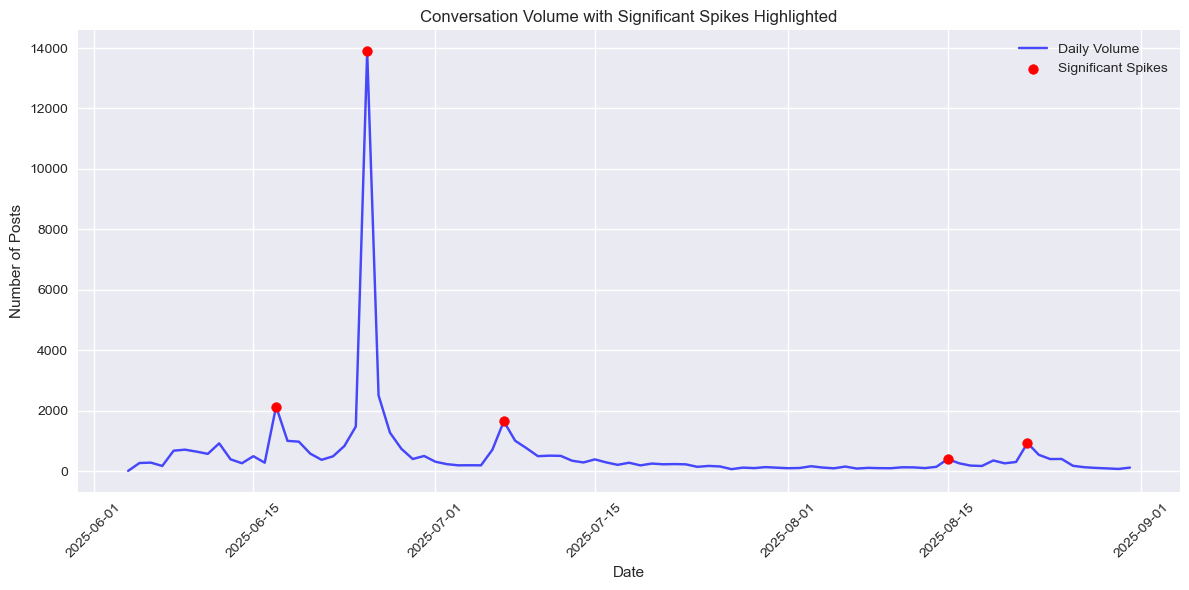

Significant conversation spikes detected on:
2025-06-17: 2136 posts
  Top emotions: {'Sadness': 329, 'Joy': 197, 'Disgust': 188}
2025-06-25: 13888 posts
  Top emotions: {'Joy': 2273, 'Sadness': 2183, 'Anger': 1407}
2025-07-07: 1646 posts
  Top emotions: {'Fear': 233, 'Sadness': 215, 'Joy': 156}
2025-08-15: 398 posts
  Top emotions: {'Joy': 82, 'Sadness': 54, 'Anger': 45}
2025-08-22: 928 posts
  Top emotions: {'Joy': 175, 'Sadness': 161, 'Disgust': 37}


In [60]:
# Additional analysis: Key spike detection with exported results
def detect_spikes(series, threshold=2):
    """Detect significant spikes in time series data"""
    z_scores = (series - series.rolling(window=7).mean()) / series.rolling(window=7).std()
    return z_scores > threshold

# Detect volume spikes
spikes = detect_spikes(daily_volume)
significant_spikes = daily_volume[spikes == True]

# Create spike visualisation
plt.figure(figsize=(12, 6))
plt.plot(daily_volume.index, daily_volume.values, color='blue', alpha=0.7, label='Daily Volume')
plt.scatter(significant_spikes.index, significant_spikes.values, color='red', s=50, zorder=5, label='Significant Spikes')
plt.title('Conversation Volume with Significant Spikes Highlighted')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Export spike analysis
plt.savefig('Conversation Spikes.png', dpi=300, bbox_inches='tight')
plt.show()

print("Significant conversation spikes detected on:")
for date, volume in significant_spikes.items():
    print(f"{date.date()}: {volume} posts")
    
    # Analyze content during spikes
    spike_content = df[df.index.date == date.date()]
    if not spike_content.empty:
        top_emotions = spike_content['Emotion'].value_counts().head(3)
        print(f"  Top emotions: {dict(top_emotions)}")

# Export spike summary to CSV
spike_summary = []
for date, volume in significant_spikes.items():
    spike_content = df[df.index.date == date.date()]
    emotion_dist = spike_content['Emotion'].value_counts().to_dict()
    spike_summary.append({
        'date': date.date(),
        'volume': volume,
        'emotion_distribution': emotion_dist
    })

spike_df = pd.DataFrame(spike_summary)
spike_df.to_csv('Spike Analysis Summary.csv', index=False)

# Analyzing Protest Conversations in the Global South: A Case Study from Kenya

Social media platforms like X (formerly Twitter) have become central spaces for political discourse, especially in regions where traditional civic spaces are shrinking. A detailed look at Kenyan protest conversations from a single day—August 31, 2025—reveals the powerful emotional currents and strategic coordination that define modern digital movements in the Global South. The dialogue was overwhelmingly charged with negative sentiment, directly linking specific government actions to a broader, passionate demand for systemic reform.

## The Rhythm of Outrage: Why Conversation Peaked

The day’s discussion wasn't a constant roar but a series of powerful surges. These spikes in activity were not random; they were directly tied to two primary, emotionally charged catalysts.

First, the conversation was repeatedly fueled by profound personal grief. A central, heartbreaking narrative was the burial of Timothy Odhiambo Bwibo, a young man allegedly shot during protests months earlier. The re-sharing of details from his funeral—and mentions of other victims and their families' pain—served as a somber, powerful reminder of the human cost of political violence. This strategy of personalizing the conflict was a key driver of the dominant emotions of Sadness and Disgust identified in the data, ensuring the issue remained emotionally resonant and impossible to ignore.

Second, clear-cut corruption scandals acted as anchors for collective anger. References to the "SHA theft" and "Ghost hospitals"—tangible examples of financial misdeeds—triggered intense outrage. This high-energy Anger is a crucial ingredient for sustained political mobilization, transforming abstract dissatisfaction into focused indignation.

## The Evolution of a Movement: From Anger to Action

Perhaps the most telling aspect of the day's discourse was its clear evolution. The conversation matured from expressing raw emotion to orchestrating concrete, real-world action.

It began with a simple, unifying frame: the hashtag #RutoMustGo. This clear demand for regime change served as the movement’s banner. From there, the critique rapidly expanded beyond single issues like the rejected finance bill. People began connecting the dots, pointing to a collapsing health sector, a failing education system, and accusations of "extrajudicial killings," painting a picture of comprehensive governance failure.

The most significant shift occurred when the digital outrage crystallized into instrumental coordination. Posts explicitly called for supporters to gather in solidarity at the Milimani Law Courts for the inquests of other victims, Rex Masai and Brian Odhiambo. This move represented a critical leap from online critique to a tangible demand for judicial accountability and physical assembly. The rallying cry, "We are our own godfathers," perfectly captured the spirit of a decentralized movement relying on grassroots solidarity rather than traditional political structures.

## Mobilizing Within Digital Constraints

The nature of the platform itself shaped how this dissent was expressed and amplified. In environments with constrained digital infrastructures and suppressed civic space, protest discourse adapts in distinct ways.

**Efficiency Through Repetition:** The mechanics of X, particularly its reliance on retweets, favor simple, emotional messages that are easy to propagate. The strategic, high-volume repetition of hashtags like #RutoMustGo and #DrainTheSwamp was a calculated effort to maximize algorithmic visibility and create an undeniable chorus of dissent.

**Emotional Compression:** When freedom of assembly is risky, protest language becomes intensely concentrated. The use of hyperbolic terms like "murderer" and "killer" is a tactical choice to cut through digital noise and public apathy, quickly establishing a moral consensus against the state. The constant flow of negative emotion acted as a continuous digital drumbeat, maintaining momentum throughout the day.

**Dual-Purpose Digital Space:** The platform served two vital functions. It was a psychological support network where people shared grief and anger, fostering a sense of community. Simultaneously, it was a practical, rapid-response planning tool for organizing physical actions like court appearances. This ability to provide both emotional sustenance and tactical direction is essential for sustaining a movement operating under significant physical risk, enabling a decentralized yet effective challenge to state power.